In [1]:
import cv2
import numpy as np 
import argparse
from matplotlib import pyplot as plt

In [ ]:
ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image', required=True, help = 'Path to input image')
ap.add_argument('-c', '--config', required=True, help = 'Path to yolo config files')
ap.add_argument('-w', '--weights', required=True, help = "Path to weigth files")
ap.add_argument('-c1', '--classes', required=True, help = "path to text file containing classes")
# args = ap.parse_args()

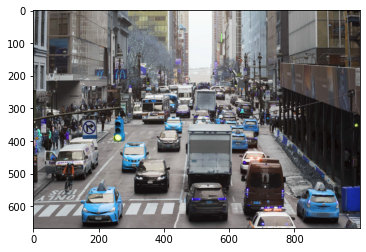

In [16]:
image = cv2.imread(r'C:\Users\R1007398\Downloads\Books_AIML\Innomatics\CV\CNN\Codes\YOLO\img\city.jpg')
plt.imshow(image)
plt.show()
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

classes = None

with open(r'C:\Users\R1007398\Downloads\Books_AIML\Innomatics\CV\CNN\Codes\YOLO\yolov3.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
''
net = cv2.dnn.readNet(r'C:\Users\R1007398\Downloads\Books_AIML\Innomatics\CV\CNN\Codes\YOLO\yolov3.weights', 
                      r'C:\Users\R1007398\Downloads\Books_AIML\Innomatics\CV\CNN\Codes\YOLO\yolov3.cfg')

blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

net.setInput(blob)

outs = net.forward(get_output_layers(net))

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

In [12]:
print(image.shape)

(666, 1000, 3)


In [17]:
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


In [20]:

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])


indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

cv2.imshow("object detection Innomatics", image)
cv2.waitKey()
    
cv2.imwrite("object-detection.jpg", image)
cv2.destroyAllWindows()

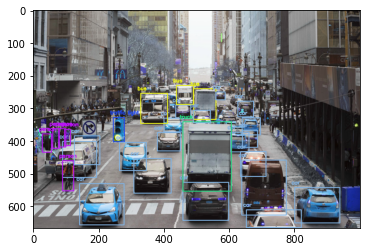

In [19]:
plt.imshow(image)
plt.show()